# Assignment 9

For this assignment , we will use the college scorecard dataset.

1 - Import necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import numpy as np

In [2]:
os.getcwd()

'C:\\Users\\shrut\\Assignment07'


2 - Retrieve the names of the 22 files and assign them to a List variable, filter out other files

Display the names of these 22 files

In [3]:
DATA_FOLDER = "../Assignment07/CollegeScorecard_Raw_Data/"
file_list = os.listdir(DATA_FOLDER)
file_list

['.ipynb_checkpoints',
 'a.DS_Store',
 'Crosswalks.zip',
 'data.yaml',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [4]:
file_name_list = [x for x in file_list if x.endswith(".csv")]
file_name_list

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

3 - Write code to randomly select one file name out of the 22 files names

Display the file name

In [5]:
import random
random.choice(file_name_list)

'MERGED1997_98_PP.csv'

4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN") from this file into a data frame aand display use info() function to display a summary information

In [6]:
COLUMN_LIST = ["INSTNM", "TUITIONFEE_IN"]
df_list = []

for file in file_name_list:
    print("Reading file " + file + " ......")
    tmp_df = pd.read_csv(DATA_FOLDER + file, usecols=COLUMN_LIST)
    #tmp_df["YEAR"] = file[6:13]
    df_list.append(tmp_df)
    
df = pd.concat(df_list, ignore_index = True)
df.info()

Reading file MERGED1996_97_PP.csv ......
Reading file MERGED1997_98_PP.csv ......
Reading file MERGED1998_99_PP.csv ......
Reading file MERGED1999_00_PP.csv ......
Reading file MERGED2000_01_PP.csv ......
Reading file MERGED2001_02_PP.csv ......
Reading file MERGED2002_03_PP.csv ......
Reading file MERGED2003_04_PP.csv ......
Reading file MERGED2004_05_PP.csv ......
Reading file MERGED2005_06_PP.csv ......
Reading file MERGED2006_07_PP.csv ......
Reading file MERGED2007_08_PP.csv ......
Reading file MERGED2008_09_PP.csv ......
Reading file MERGED2009_10_PP.csv ......
Reading file MERGED2010_11_PP.csv ......
Reading file MERGED2011_12_PP.csv ......
Reading file MERGED2012_13_PP.csv ......
Reading file MERGED2013_14_PP.csv ......
Reading file MERGED2014_15_PP.csv ......
Reading file MERGED2015_16_PP.csv ......
Reading file MERGED2016_17_PP.csv ......
Reading file MERGED2017_18_PP.csv ......
Reading file MERGED2018_19_PP.csv ......
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163331 

In [7]:
df.reset_index(drop=True, inplace=True)
df.head(5)

,INSTNM,TUITIONFEE_IN
0,Community College of the Air Force,NaN
1,Alabama A & M University,NaN
2,University of Alabama at Birmingham,NaN
3,ALABAMA AVIATION AND TECHNICAL COLLEGE,NaN
4,Amridge University,NaN


In [8]:
df.shape

(163331, 2)

5 - Find out how many observations have missing value.

In [9]:
df.isnull().sum()

INSTNM               0
TUITIONFEE_IN    84137
dtype: int64

7 - Find out how many observations have 0 tution.

In [10]:
(df != 0).all()

INSTNM            True
TUITIONFEE_IN    False
dtype: bool

6 - Drop those observations with missing value. Display the number of observations afterward. 

8 - Drop those observations with 0 tuition. Display the number of observations afterward.

In [11]:
df.dropna(subset = ["TUITIONFEE_IN"], inplace=True)

In [12]:
df.shape

(79194, 2)

In [13]:
df.sample(5)

,INSTNM,TUITIONFEE_IN
111956,Georgia Southwestern State University,4914.0
158843,St Paul's School of Nursing-Staten Island,17395.0
147785,Institute of Production and Recording,17460.0
71809,Victoria College,1390.0
76777,ITT Technical Institute-Earth City,15600.0


9 - Calculate and display the mean (average) of the tuitions of all the remaining observations

In [14]:
df_mean = df["TUITIONFEE_IN"].mean()

In [15]:
df_mean

11665.505366568173

10 - Randomly select just 1 observation from the data frame. Display the tuition of that observation.

In [16]:
randomdf  = df.sample(n = 1)

In [17]:
randomdf

,INSTNM,TUITIONFEE_IN
71339,Shippensburg University of Pennsylvania,6549.0


In [18]:
randomdf.reset_index(drop=True, inplace=True)

11 - Calculate the different between the tuition of this observation and the mean tuition off all observations calculated earlier. Display the difference. 

12 - Repeat 10 to 11 several times get the feel of the size of the difference in means

In [19]:
diff = randomdf["TUITIONFEE_IN"] - df_mean

In [20]:
diff

0   -5116.505367
Name: TUITIONFEE_IN, dtype: float64

13 - Randomly select 20 observations, display the tuition of these observation.

In [21]:
randdf  = df.sample(n = 20)

In [22]:
randdf

,INSTNM,TUITIONFEE_IN
134739,California State University-San Bernardino,6577.0
90960,Truckee Meadows Community College,2010.0
90842,Park University,8394.0
149876,Santa Barbara Business College-Bakersfield,10000.0
129320,Rabbinical College of Long Island,8800.0
59503,Baker College of Jackson,6120.0
151972,Richmond Community College,2516.0
60164,DeVry University-Colorado,11880.0
45011,Wayland Baptist University,8060.0
49671,State Technical College of Missouri,3890.0


14 - Calculate and display the mean tuition of these 20 observations

In [23]:
df_randmean = randdf["TUITIONFEE_IN"].mean()

In [24]:
df_randmean

9791.9

15 - Calculate  the different between the average tuition of these 20 observations and the mean tuition off all observations calculated earlier. Display the difference

16 - Repeat 13 to 15 several times and get the feel of the size of the difference in means. 

In [25]:
maindiff = df_randmean - df_mean

In [26]:
maindiff

-1873.6053665681738

17 - Write a function that take two input parameters:

- x (number of observations)
- y (the name of the dataframe).

The function will perform the following:

- Randomly select x observations from y
- Calculate the mean of these x observations
- Calculate the mean of all observations
- Calculate the difference between the two means
- Return the difference

In [27]:
def multiply_values(observations,dataframe):
    df_mean = dataframe["TUITIONFEE_IN"].mean() #Calculate the mean of all observations
    df_sample = dataframe.sample(n = observations) # Randomly select x observations from y
    df_sample_mean = df_sample["TUITIONFEE_IN"].mean() #Calculate the mean of these x observations
    diff=   df_sample_mean - df_mean
    return diff


18 - Test the function by passing a sample size and the name of the dataframe. Display the return of the function

In [28]:
multiply_values(2,df)

-2680.5053665681735

19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes"; display it to make sure its members are from 1 to 50

In [29]:
sample_sizes = [x for x in range(1, 51)]
print(sample_sizes)

means_diff = [] #Create an empty list and name it "means_diff" for differences of population mean and sample means




[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
 - Loop through the list sample_sizes:
 - For each element in the sample size list, obtain a random sample of that size from the data frame;
 - Calculate the sample mean 
 - Calculate the difference between the population mean and the sample mean
 - Append the difference to the list "means_diff"
 - Display the list "means_diff" after the loop is completed

In [30]:
import random
random.shuffle(sample_sizes)
for x in sample_sizes:
    new_sample = df.sample(n=x)
    df_new_sample_mean = new_sample["TUITIONFEE_IN"].mean()
    df_population_mean = df["TUITIONFEE_IN"].mean()
    diff_new = df_new_sample_mean - df_population_mean  
    means_diff.append (diff_new)
  # print(means_diff)
print(means_diff)


[228.9092675781685, 14683.494633431827, -2268.0053665681735, -321.6592127220192, -1541.9053665681731, 2015.5371866233163, -958.6482237110304, -4338.7553665681735, -4005.791080853888, -5449.0053665681735, 1250.7446334318265, -1995.6848537476599, 866.8946334318262, 825.3517762889696, -6357.5053665681735, -415.927588790395, -267.0886999015074, 516.3424595187826, -431.71589288396353, 6471.661300098494, 5759.294633431826, -659.9377990006051, -1273.1788359559287, -3408.6720332348395, -462.94981101261874, -1274.85019415438, 565.0097849469785, -3486.865366568173, -583.6998110126187, -5065.5053665681735, -441.0053665681735, -119.14173020453745, -608.1095332348395, 37.11001804721127, -318.2653665681737, 2610.044633431826, -223.86900293180952, -261.35536656817385, -1535.3288959799374, 4823.949178886371, 2979.257791326563, 4779.4946334318265, 2152.589871527065, -1224.4355991263128, 2613.173204860397, 1544.3383834318265, -2453.711248921114, -2093.0705839594775, 960.7089191461127, -1746.537624632690

21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis. Observe as the sample size increases, the sample means converge to the population mean.

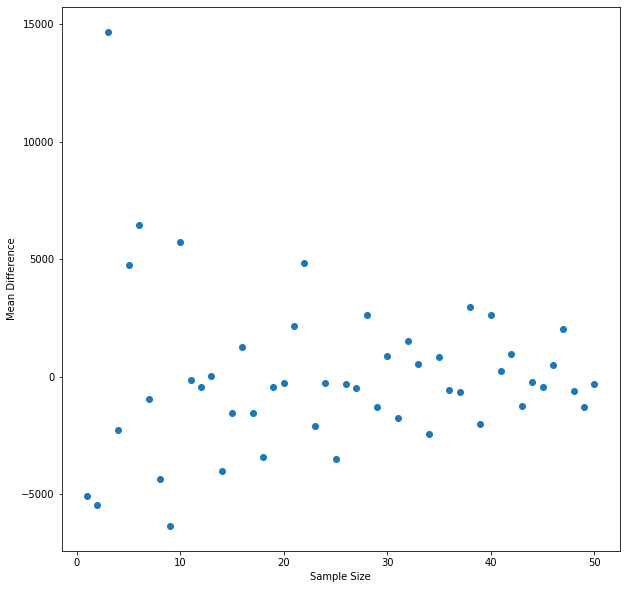

In [31]:
x = sample_sizes
y = means_diff

plt.figure(num = None, figsize = (10,10))
plt.scatter(x,y)
plt.xlabel('Sample Size')
plt.ylabel('Mean Difference')
plt.show()


22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000 and see how the plot looks.

In [32]:
sample_sizes_big = [x for x in range(1, 1001)]
print(sample_sizes_big)

means_diff_big = [] #Create an empty list and name it "means_diff" for differences of population mean and sample means




[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [33]:
import random
random.shuffle(sample_sizes_big)
for x in sample_sizes_big:
    new_sample = df.sample(n=x)
    df_new_sample_mean = new_sample["TUITIONFEE_IN"].mean()
    df_population_mean = df["TUITIONFEE_IN"].mean()
    diff_new = df_new_sample_mean - df_population_mean  
    means_diff_big.append (diff_new)
  # print(means_diff)
print(means_diff_big)

[412.34178790337137, 351.340878962219, 329.433364285218, 176.70477835936254, 102.41304578022755, -187.0456891488193, -261.6976329484096, 449.37102541400964, -484.9379247077086, -719.6373847775812, 173.18866328257354, -2716.7910808538873, -761.7406606858203, 1202.8183882210978, 246.96712534121252, 283.01063343182614, -12.014000791094077, -460.49484025238417, 838.6527151369773, -336.4609539607245, -439.1754276679694, -38.96030842863911, -805.3038740308602, 65.69268537987773, -397.18869990150597, -660.6923584380929, 138.3047109512063, -800.6097143942607, -732.9319399947472, -347.862345973208, -62.863391259532364, -249.61320970542874, 1928.0642536849919, -357.8097143942596, -387.52388508669173, -816.8066561344094, -334.03587504274947, 289.2101833686156, -65.54041585623418, 294.2765483254443, 940.1539740911667, -113.5572472426229, 1060.234359459224, -313.11206112884247, 38.191185155965286, -73.98144857272928, 86.70235402006256, -1288.4312924940987, 2395.644633431826, 262.74654182877384, 865

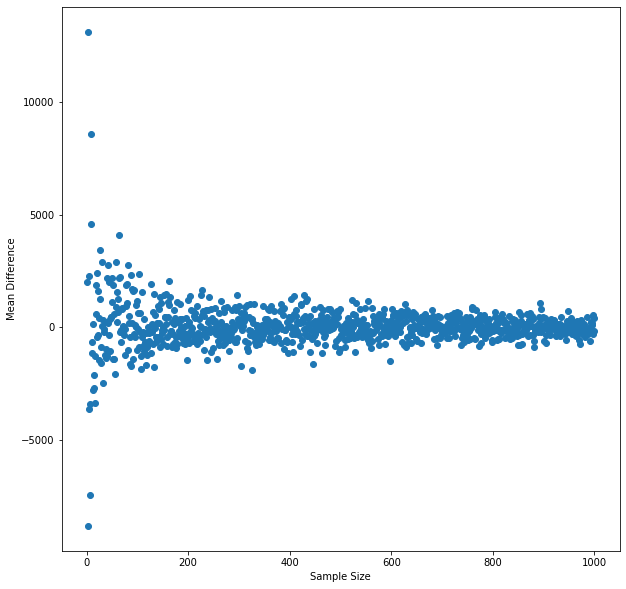

In [34]:
x = sample_sizes_big
y = means_diff_big

plt.figure(num = None, figsize = (10,10))
plt.scatter(x,y)
plt.xlabel('Sample Size')
plt.ylabel('Mean Difference')
plt.show()
